# Rakamin Final Project

## Import Libraries

In [7]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing necessary libraries for iterative imputation
from sklearn.experimental import enable_iterative_imputer  # Enable IterativeImputer
from sklearn.impute import IterativeImputer

# Importing relevant libraries for machine learning and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

## Data Understanding

In [9]:
data = pd.read_csv('loan_data_2007_2014.csv')

In [10]:
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [12]:
data.shape

(466285, 75)

In [13]:
import pandas as pd

def find_columns_with_missing_values(df):
    # Hitung jumlah nilai hilang di setiap kolom
    missing_columns = df.isnull().sum()

    # Filter hanya kolom yang memiliki nilai hilang
    missing_columns = missing_columns[missing_columns > 0]

    return missing_columns


In [14]:
missing_columns = find_columns_with_missing_values(data)

print("\nKolom dengan Nilai Hilang:")
print(missing_columns)


Kolom dengan Nilai Hilang:
emp_title                       27588
emp_length                      21008
annual_inc                          4
desc                           340304
title                              21
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_util                        340
total_acc                          29
last_pymnt_d                      376
next_pymnt_d                   227214
last_credit_pull_d                 42
collections_12_mths_ex_med        145
mths_since_last_major_derog    367311
annual_inc_joint               466285
dti_joint                      466285
verification_status_joint      466285
acc_now_delinq                     29
tot_coll_amt                    70276
tot_cur_bal                     70276
open_acc_6m           

In [15]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

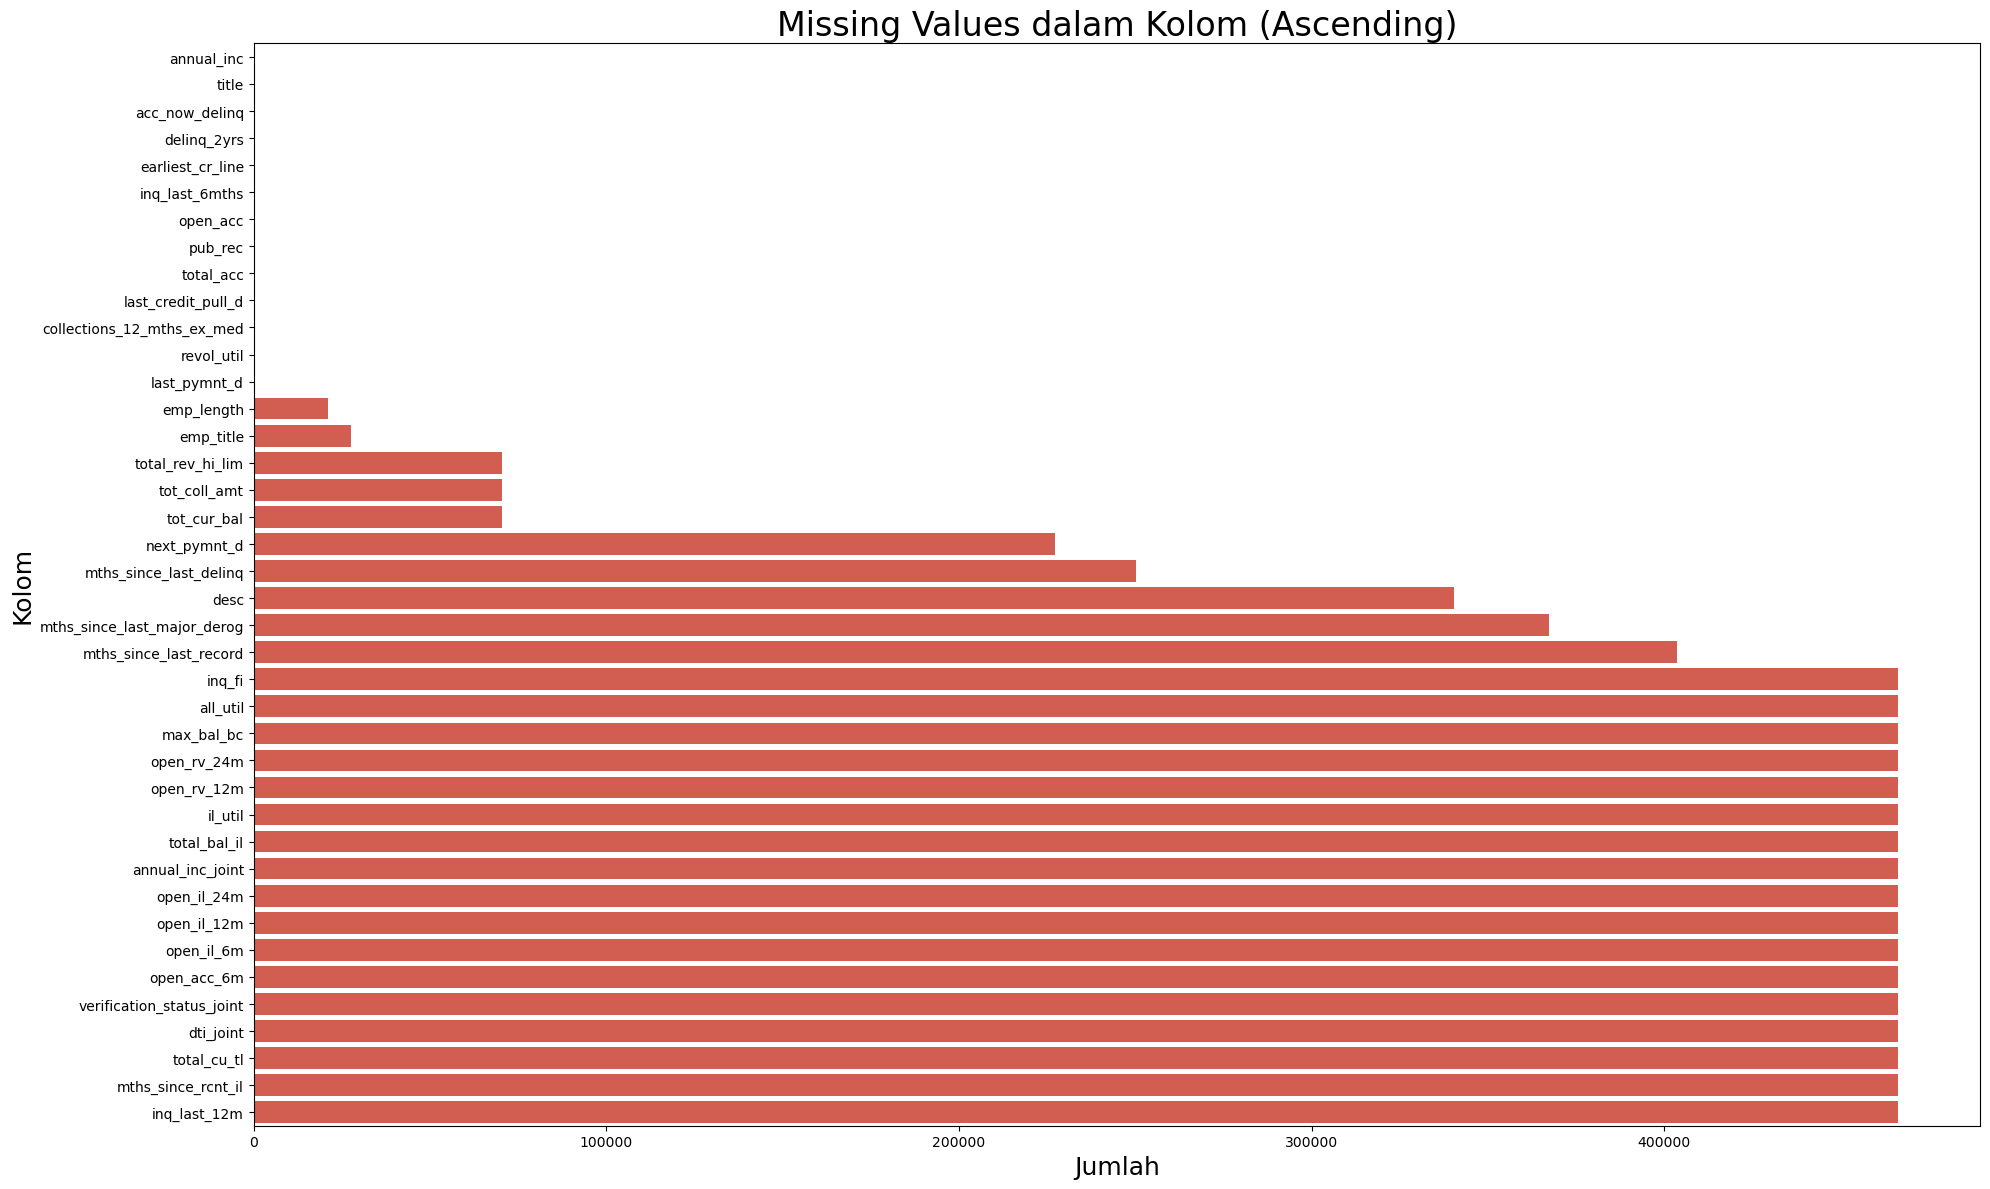

In [16]:
# Menghitung jumlah missing values per kolom
missing_values = data.isnull().sum()
green_palette = ['#2ecc71']
red_palette = ['#e74c3c']

# Membuat DataFrame untuk visualisasi
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values,
    'Percentage': (missing_values.values / len(data)) * 100
})

# Filter hanya kolom yang memiliki missing values
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Missing Values', ascending=True)  # Diurutkan dari sedikit ke banyak

# Membuat visualisasi blok area
plt.figure(figsize=(20, 12))
sns.barplot(
    data=missing_df,
    x='Missing Values',
    y='Column',
    palette=red_palette
)

# Menambahkan judul dan label
plt.title('Missing Values dalam Kolom (Ascending)', fontsize=24)
plt.xlabel('Jumlah', fontsize=18)
plt.ylabel('Kolom', fontsize=18)

# Menyimpan visualisasi ke file JPG
plt.tight_layout()
plt.savefig("missing_values.jpg", format='jpg', dpi=300)  # Resolusi tinggi 300 dpi

# Menampilkan visualisasi di layar
plt.show()

---

## EDA (Exploratory Data Analysis)

pada segmen EDA kita akan meihat beberapa hal yang menarik berkaitan dengan pola yang ada pada data yang ada

In [20]:
# Membuat copy dari DataFrame 'data'
data_copy = data.copy()

In [21]:
# 1. Pemahaman Data
print("\n--- Tipe Data ---")
print(data_copy.dtypes)

print("\n--- Statistik Deskriptif ---")
print(data_copy.describe())

print("\n--- Nilai Hilang ---")
print(data_copy.isnull().sum())


--- Tipe Data ---
Unnamed: 0            int64
id                    int64
member_id             int64
loan_amnt             int64
funded_amnt           int64
                     ...   
all_util            float64
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
Length: 75, dtype: object

--- Statistik Deskriptif ---
          Unnamed: 0            id     member_id      loan_amnt  \
count  466285.000000  4.662850e+05  4.662850e+05  466285.000000   
mean   233142.000000  1.307973e+07  1.459766e+07   14317.277577   
std    134605.029472  1.089371e+07  1.168237e+07    8286.509164   
min         0.000000  5.473400e+04  7.047300e+04     500.000000   
25%    116571.000000  3.639987e+06  4.379705e+06    8000.000000   
50%    233142.000000  1.010790e+07  1.194108e+07   12000.000000   
75%    349713.000000  2.073121e+07  2.300154e+07   20000.000000   
max    466284.000000  3.809811e+07  4.086083e+07   35000.000000   

         fund

sebelum melakukan analisis heatmap , sebaiknya kita harus menghapus kolom kolom yang tidak memiliki nilai sama sekali untuk menghemat dan memudahkan visualisasi data sehingga tidak terlalu banyak kolom

In [23]:
data_copy = data_copy.dropna(axis=1, how = 'all')

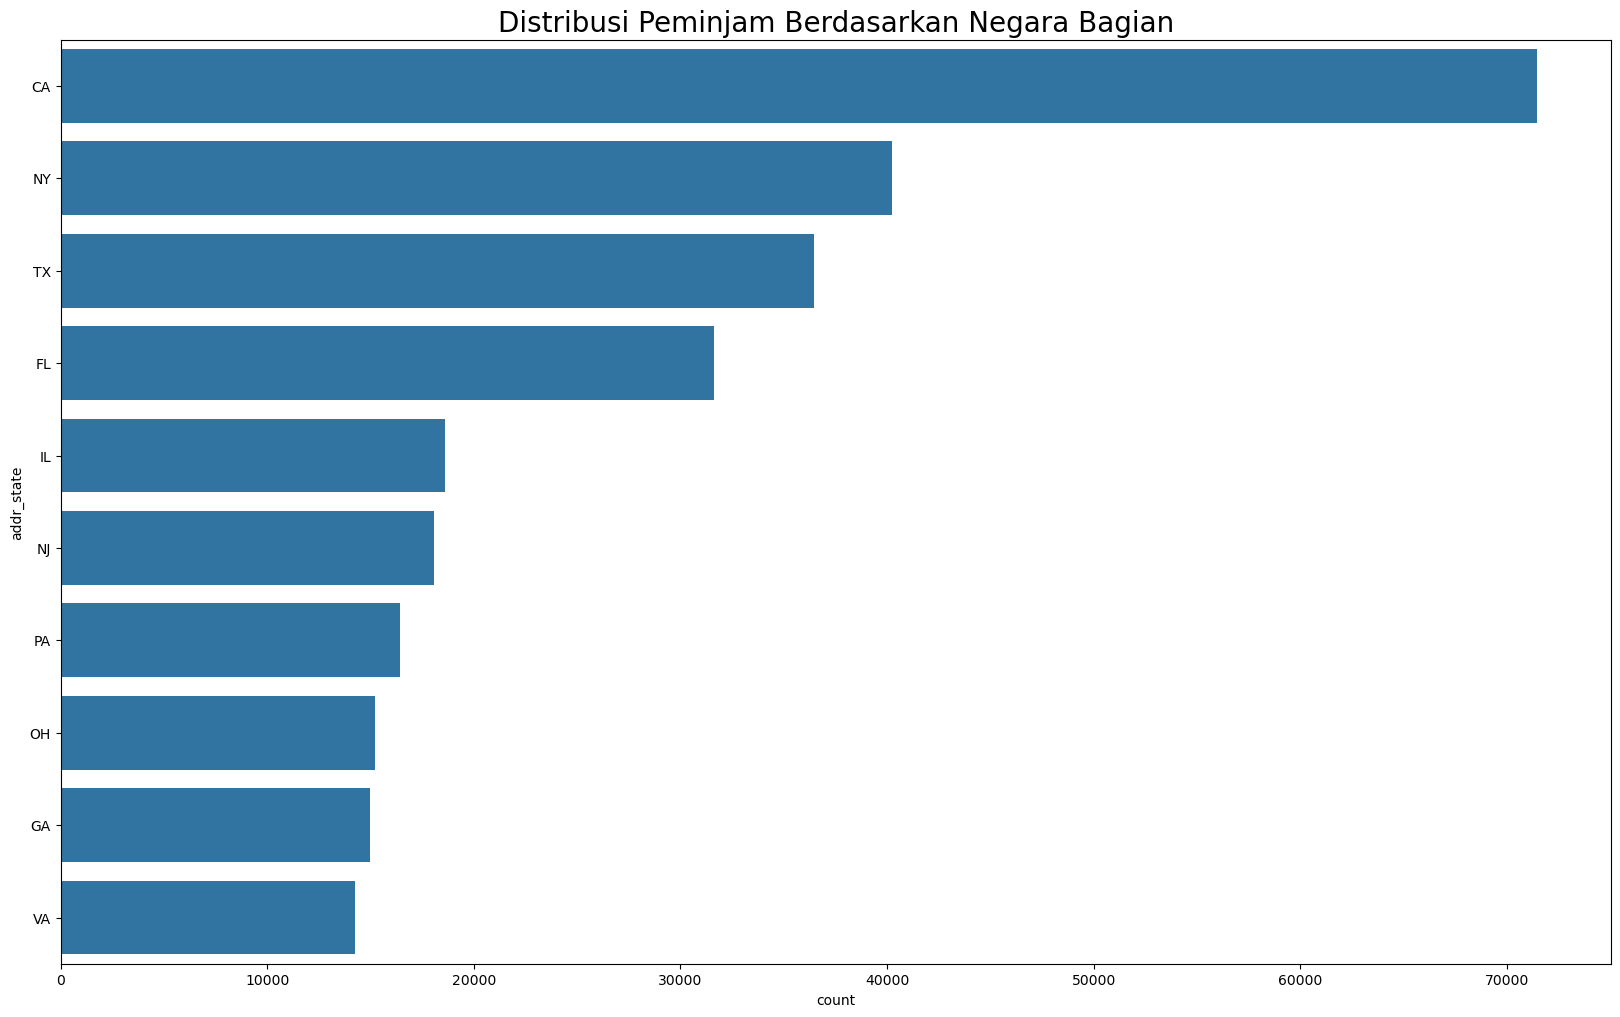

In [24]:
# 2. Analisis Kolom-Kolom Penting
# a. Demografi Peminjam
plt.figure(figsize=(20, 12))
sns.countplot(y=data_copy['addr_state'], order=data_copy['addr_state'].value_counts().head(10).index)
plt.title("Distribusi Peminjam Berdasarkan Negara Bagian", fontsize=20)

# Menyimpan gambar ke file
plt.savefig("distribusi_peminjam_negara_bagian.png", bbox_inches="tight")

plt.show()

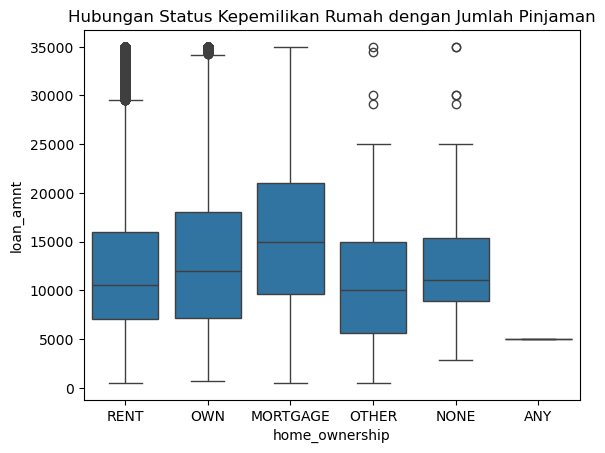

In [25]:
sns.boxplot(x='home_ownership', y='loan_amnt', data=data_copy)
plt.title("Hubungan Status Kepemilikan Rumah dengan Jumlah Pinjaman")
plt.show()

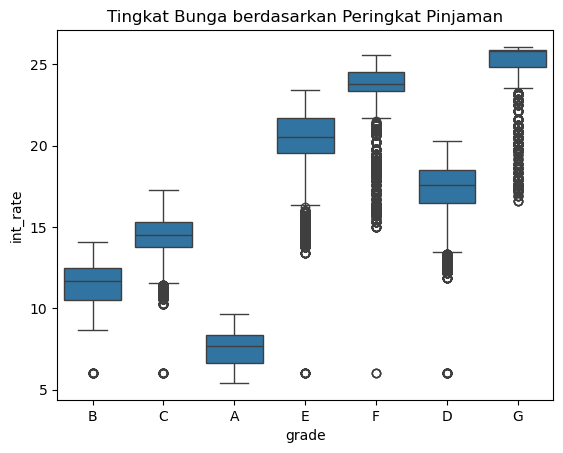

In [26]:
# c. Karakteristik Pinjaman
sns.boxplot(x='grade', y='int_rate', data=data_copy)
plt.title("Tingkat Bunga berdasarkan Peringkat Pinjaman")
plt.show()

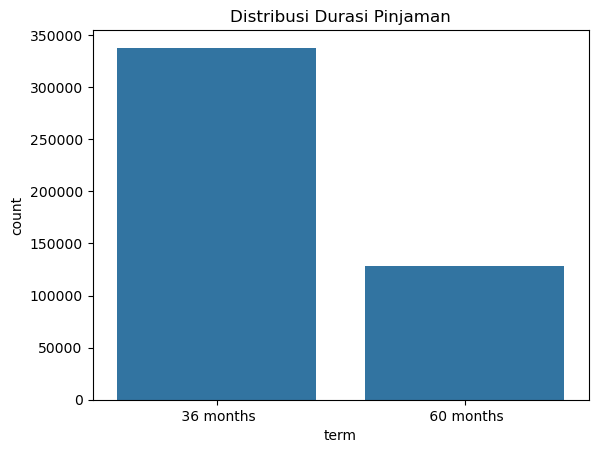

In [27]:
sns.countplot(x='term', data=data_copy)
plt.title("Distribusi Durasi Pinjaman")
plt.show()

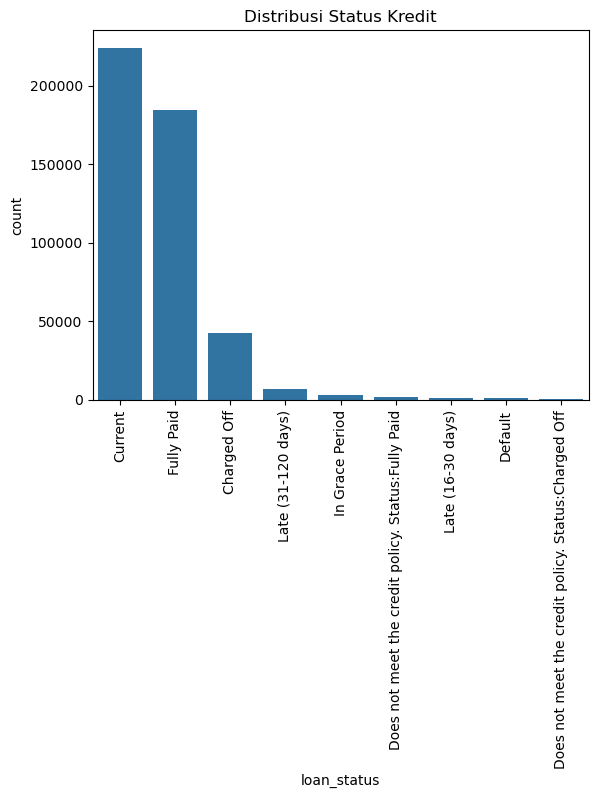

In [28]:
# e. Status Kredit
sns.countplot(x='loan_status', data=data_copy, order=data_copy['loan_status'].value_counts().index)
plt.title("Distribusi Status Kredit")
plt.xticks(rotation=90)
plt.show()

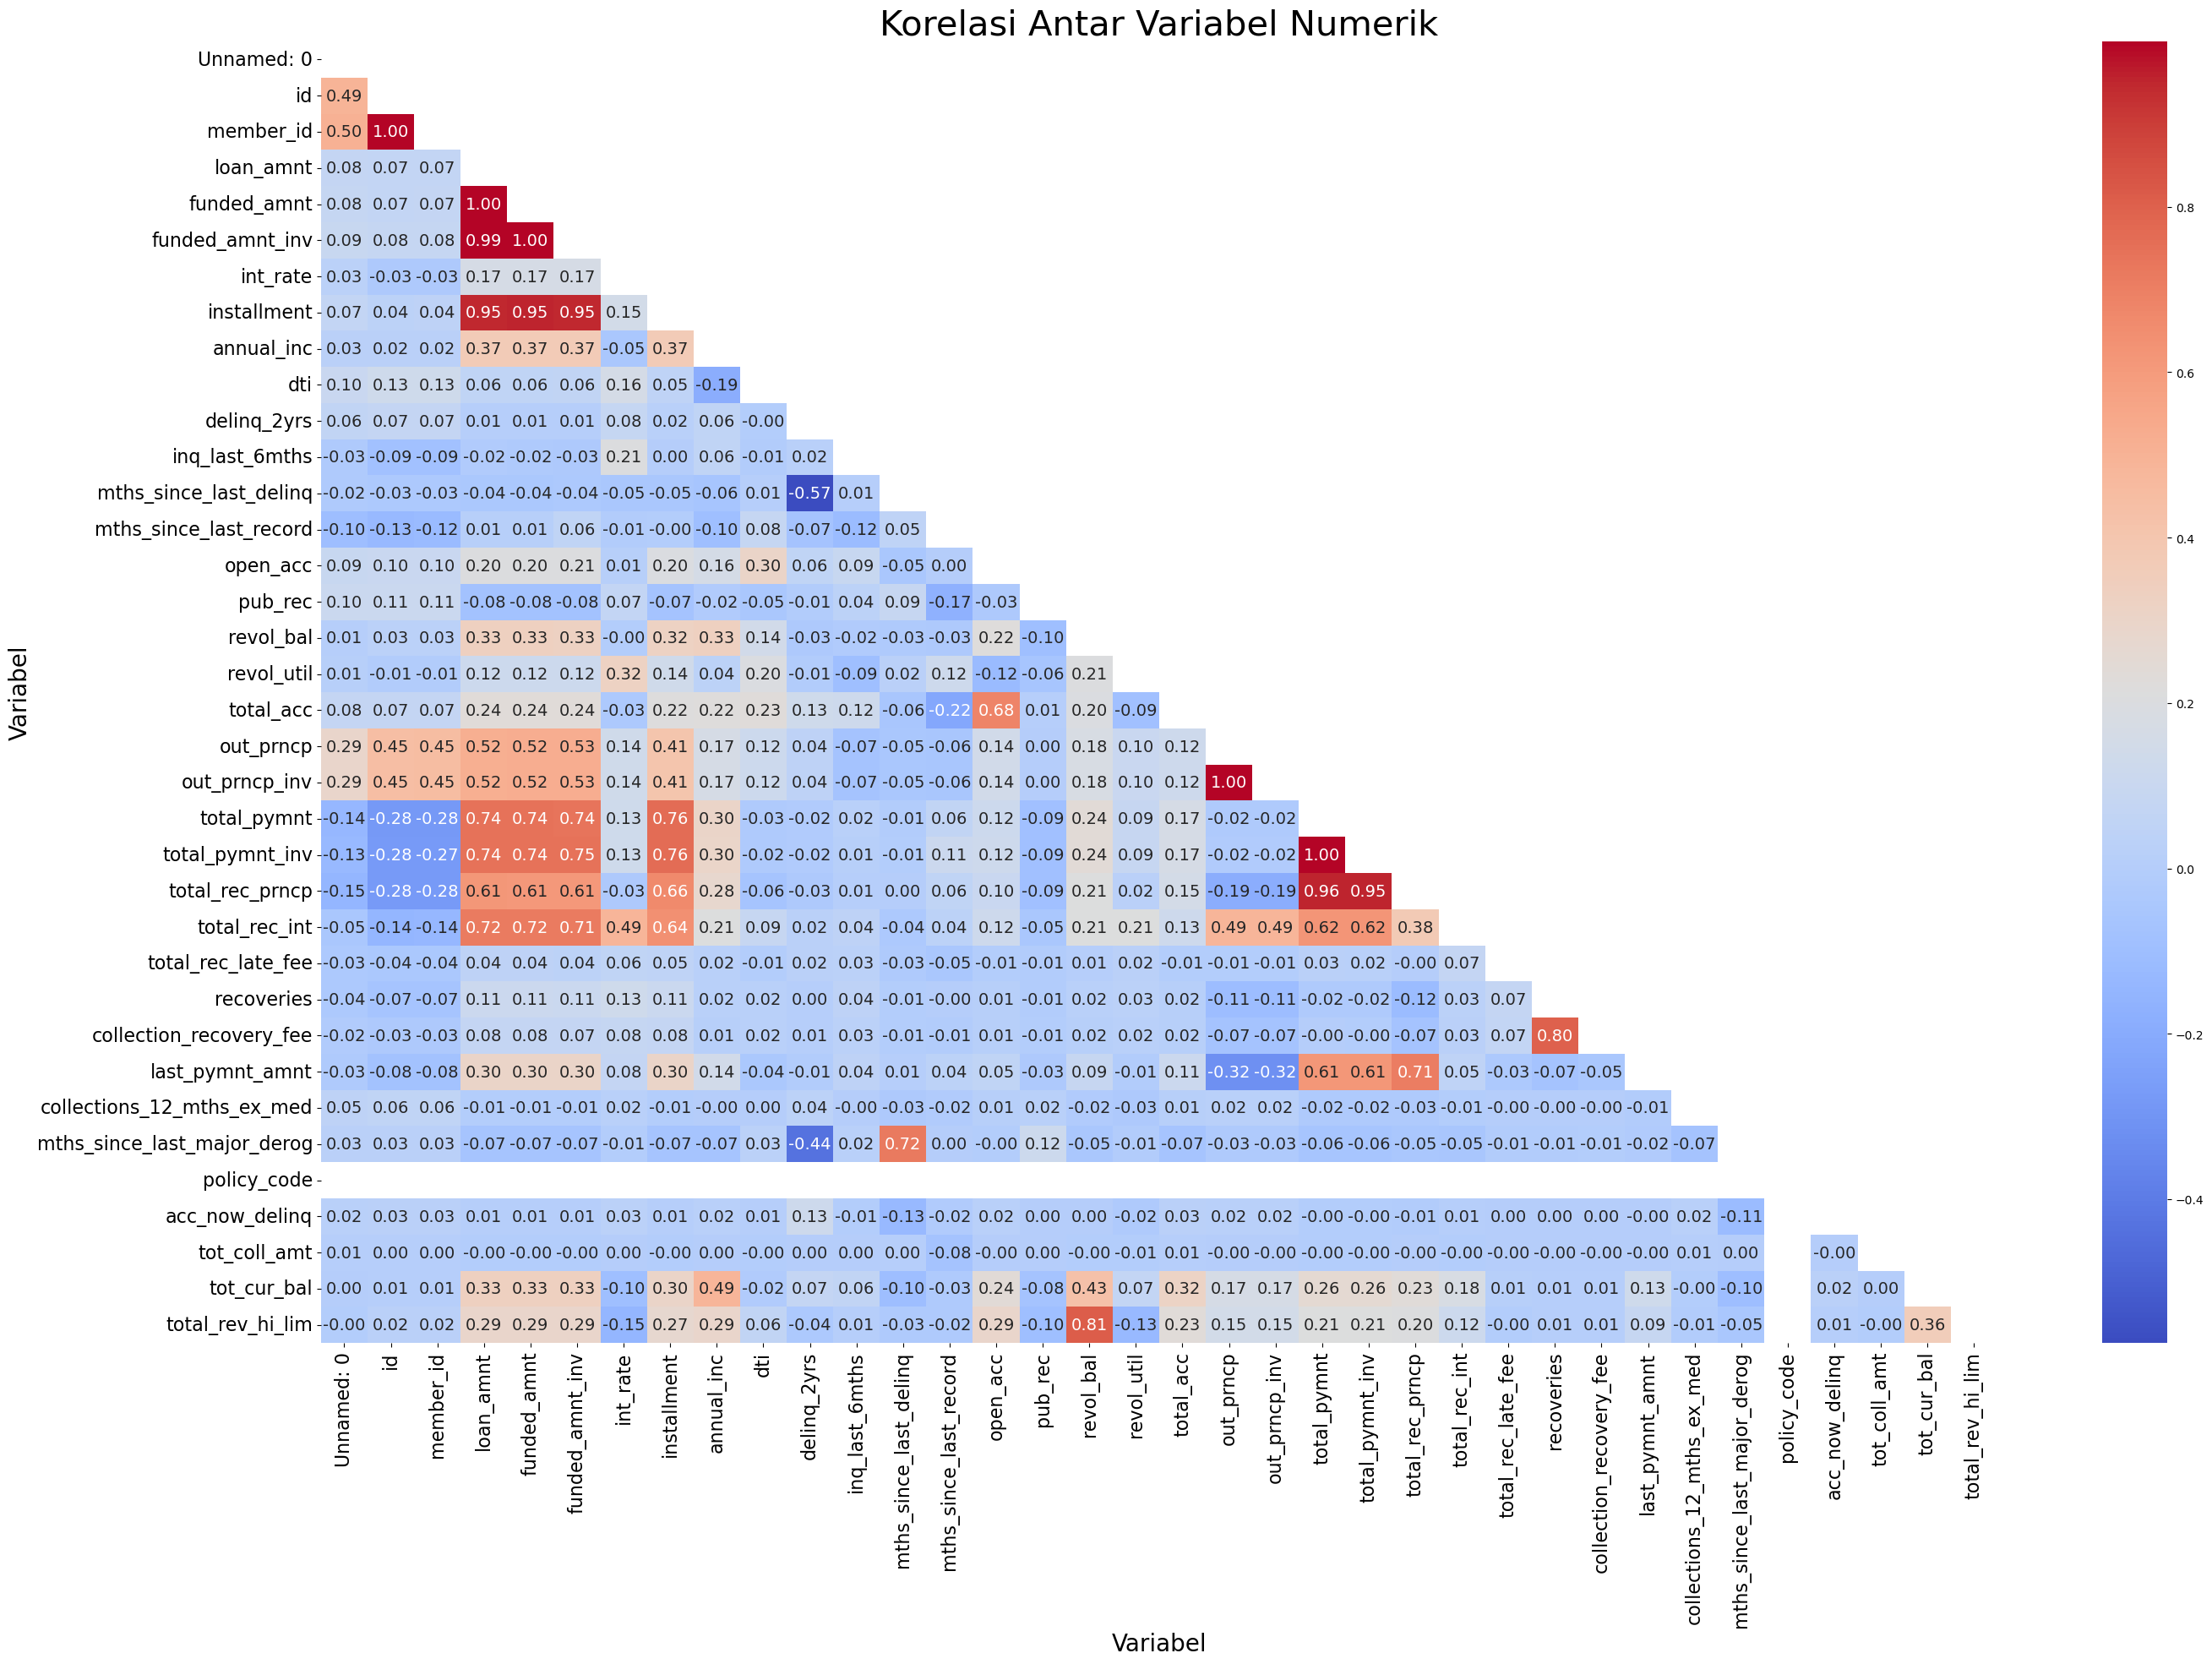

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Analisis Korelasi
numerical_features = data_copy.select_dtypes(include=[np.number])
correlation_matrix = numerical_features.corr()

# Membuat setengah segitiga dengan mengubah nilai di atas diagonal menjadi NaN
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(32, 20))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    annot_kws={"size": 14},  # Ukuran teks dalam kotak heatmap
    mask=mask  # Menggunakan mask untuk menutupi setengah segitiga
)

# Memperbesar ukuran teks judul dan label sumbu
plt.title("Korelasi Antar Variabel Numerik", fontsize=30)  # Ukuran font judul
plt.xlabel("Variabel", fontsize=20)  # Ukuran font label x
plt.ylabel("Variabel", fontsize=20)  # Ukuran font label y

# Memperbesar ukuran teks pada sumbu x dan y
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("heatmap.jpg", format='jpg')

plt.show()

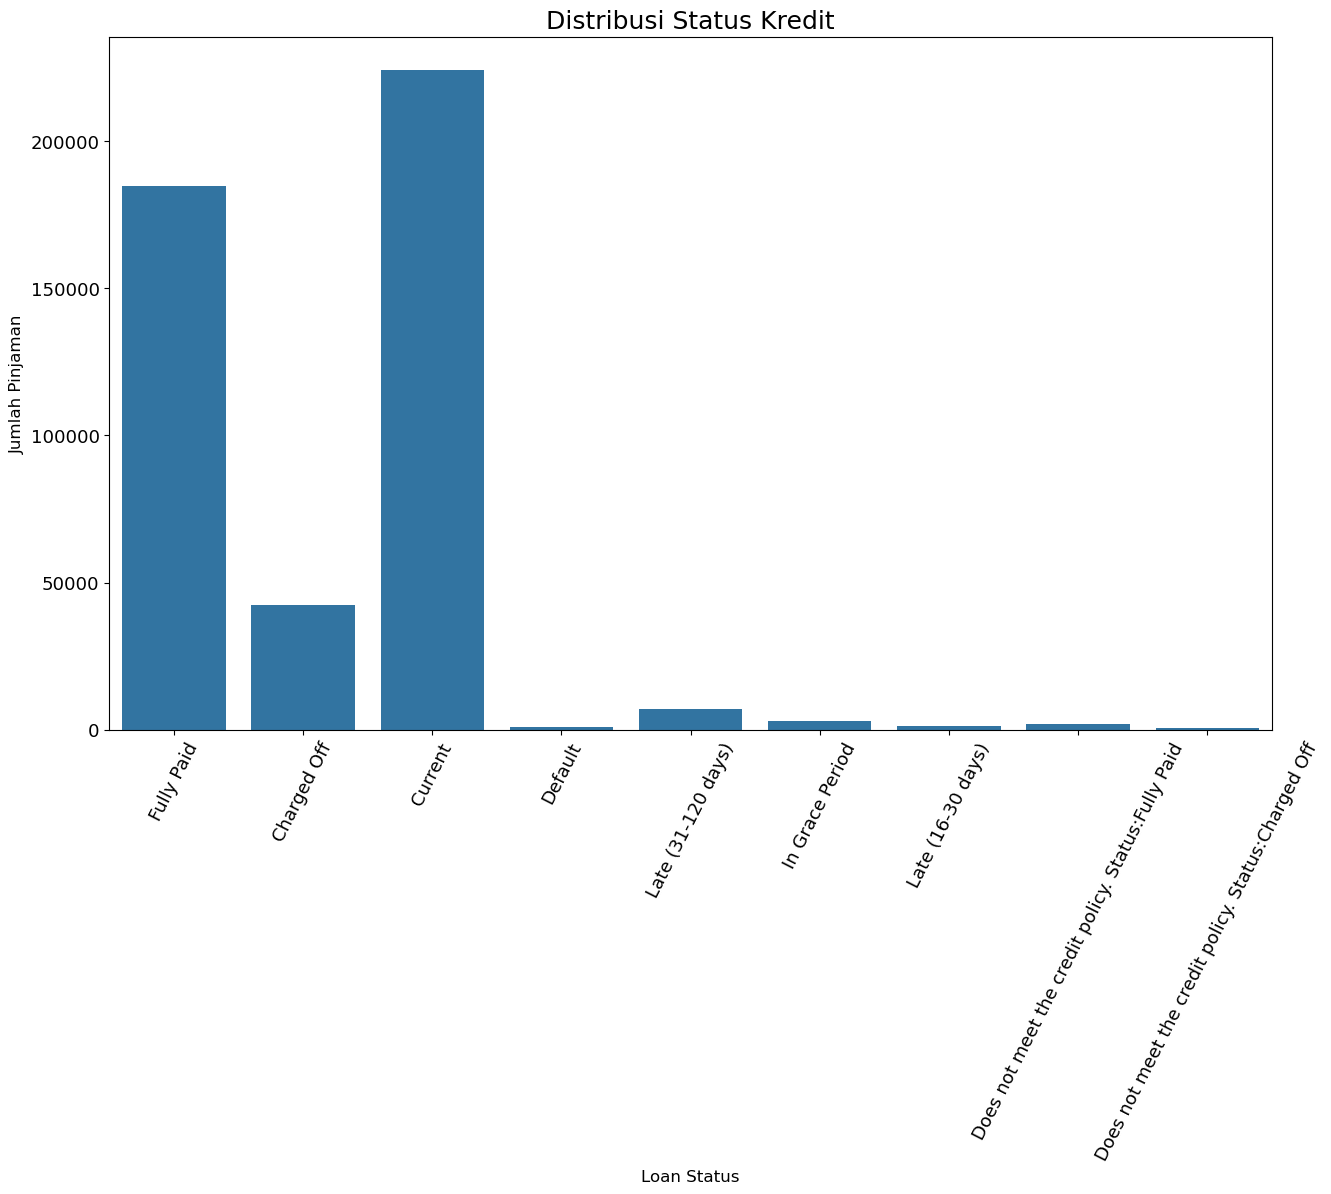

In [30]:
# Visualisasi Distribusi Status Kredit dengan ukuran font yang lebih besar
plt.figure(figsize=(15, 9))
sns.countplot(x='loan_status', data=data_copy)

# Mengubah ukuran judul, label sumbu x, dan label sumbu y
plt.title("Distribusi Status Kredit", fontsize=18)  # Ukuran font judul
plt.xlabel("Loan Status", fontsize=12)  # Ukuran font label sumbu x
plt.ylabel("Jumlah Pinjaman", fontsize=12)  # Ukuran font label sumbu y

# Mengubah ukuran font pada label sumbu x dan y
plt.xticks(rotation=63, fontsize=13)  # Ukuran font pada label sumbu x
plt.yticks(fontsize=13)  # Ukuran font pada label sumbu y

plt.savefig("distribusi status kredit.jpg", format='jpg')
# Menampilkan plot
plt.show()

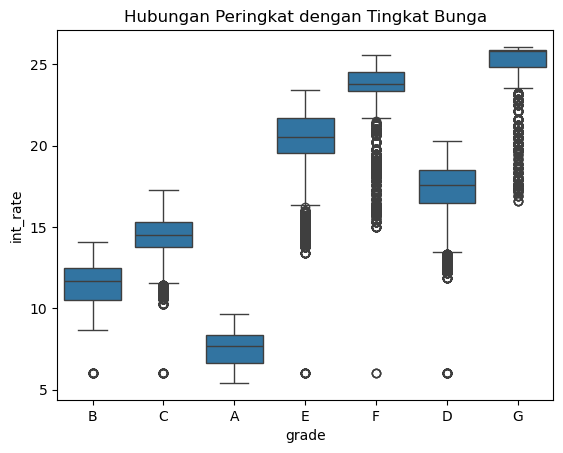

In [31]:
# c. Peringkat Pinjaman
sns.boxplot(x='grade', y='int_rate', data=data_copy)
plt.title("Hubungan Peringkat dengan Tingkat Bunga")
plt.show()

untuk melihat beberapa statistik berkaitan dengan waktu , kita harus melakukan transform beberapa kolom yang memiliki data waktu seperti tanggal dan bulan . saya akan melakukan transformasi data untuk mengekstraksi bulan dari beberapa kolom

In [33]:
data_copy['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [34]:
data_copy['next_pymnt_d']

0            NaN
1            NaN
2            NaN
3            NaN
4         Feb-16
           ...  
466280    Feb-16
466281       NaN
466282    Feb-16
466283       NaN
466284    Feb-16
Name: next_pymnt_d, Length: 466285, dtype: object

In [35]:
data_copy['last_credit_pull_d']

0         Jan-16
1         Sep-13
2         Jan-16
3         Jan-15
4         Jan-16
           ...  
466280    Jan-16
466281    Jan-16
466282    Dec-15
466283    Apr-15
466284    Jan-16
Name: last_credit_pull_d, Length: 466285, dtype: object

In [36]:
# Kolom lainnya tetap sama
data_copy['next_pymnt_d'] = data_copy['next_pymnt_d'].str[:3]
data_copy['last_credit_pull_d'] = data_copy['last_credit_pull_d'].str[:3]
data_copy['earliest_cr_line'] = data_copy['earliest_cr_line'].str[:3]

# Mapping bulan ke angka
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

data_copy['next_pymnt_d'] = data_copy['next_pymnt_d'].map(month_mapping)
data_copy['last_credit_pull_d'] = data_copy['last_credit_pull_d'].map(month_mapping)

In [37]:
data_copy[['earliest_cr_line','next_pymnt_d','last_credit_pull_d']].dtypes

earliest_cr_line       object
next_pymnt_d          float64
last_credit_pull_d    float64
dtype: object

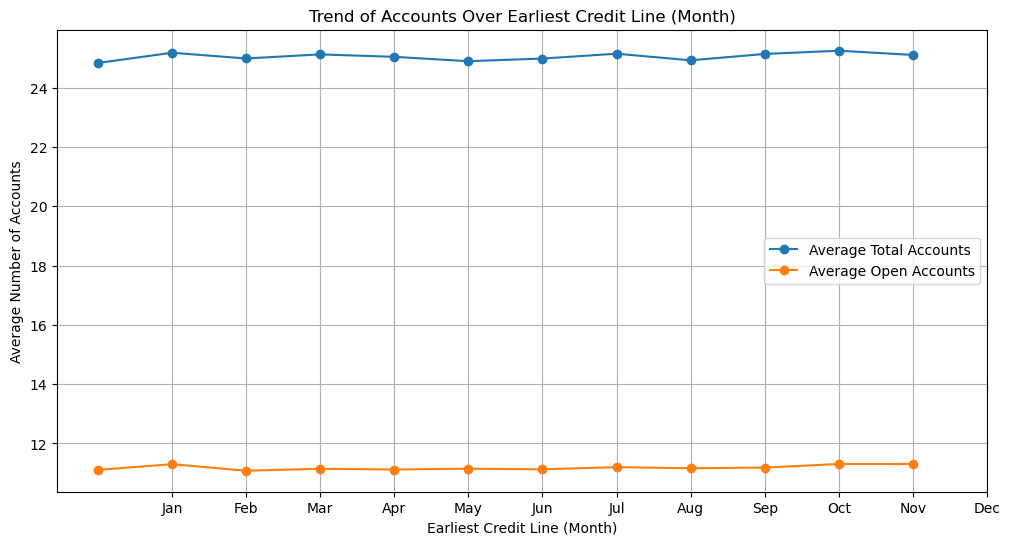

In [38]:
# Analisis Tren Berdasarkan `earliest_cr_line` (dalam bulan) dan Total Akun
earliest_trend = data_copy.groupby('earliest_cr_line').agg({
    'total_acc': 'mean',
    'open_acc': 'mean'
}).reset_index()

# Plot Tren `earliest_cr_line` dan Akun
plt.figure(figsize=(12, 6))
plt.plot(earliest_trend['earliest_cr_line'], earliest_trend['total_acc'], label='Average Total Accounts', marker='o')
plt.plot(earliest_trend['earliest_cr_line'], earliest_trend['open_acc'], label='Average Open Accounts', marker='o')
plt.title('Trend of Accounts Over Earliest Credit Line (Month)')
plt.xlabel('Earliest Credit Line (Month)')
plt.ylabel('Average Number of Accounts')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.legend()
plt.grid()
plt.show()


In [39]:
data_copy.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,1.0,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,9.0,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,1.0,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,1.0,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,2.0,1.0,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


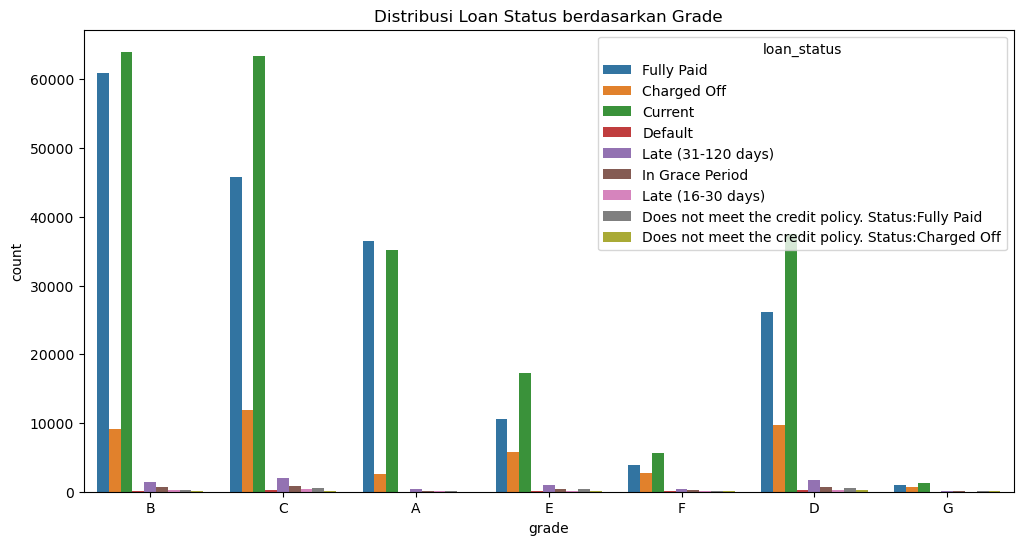

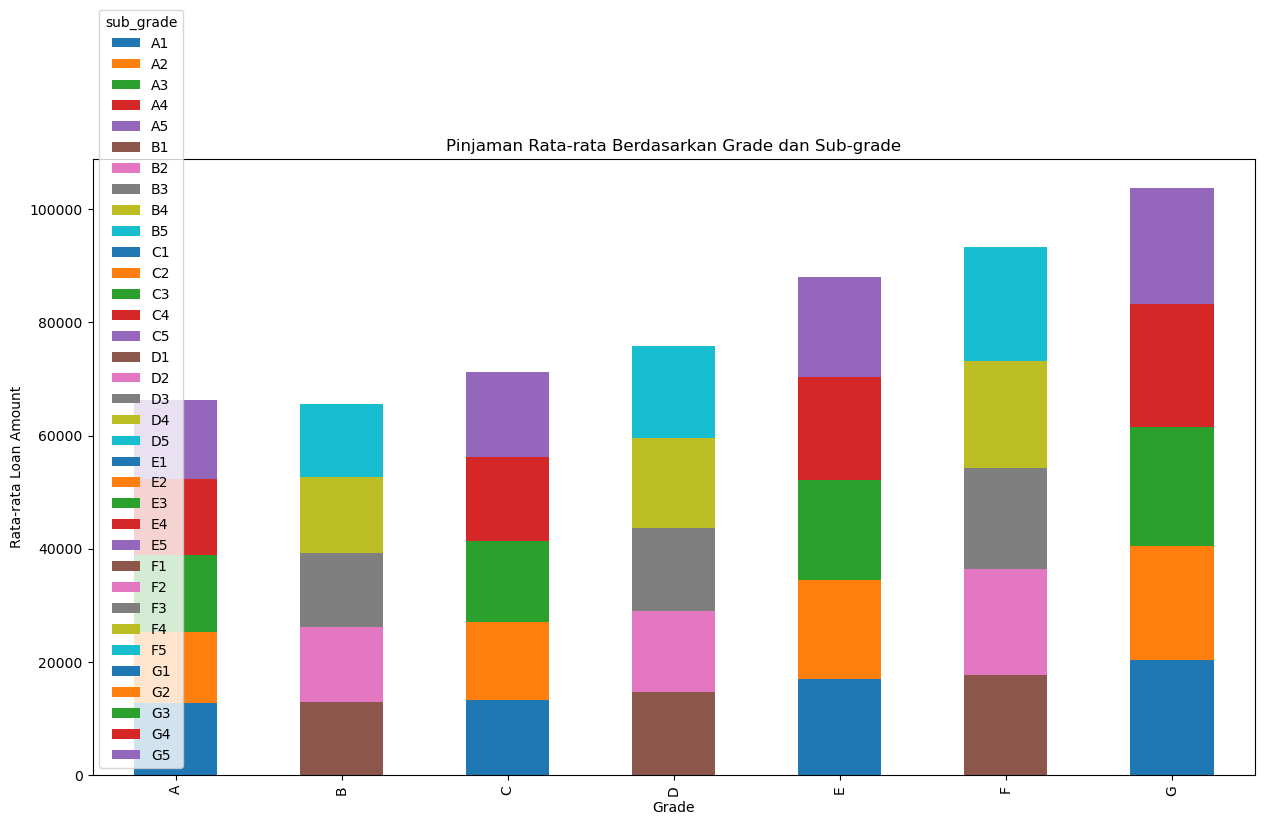

In [40]:
# Distribusi jumlah pinjaman berdasarkan grade dan sub_grade
plt.figure(figsize=(12, 6))
sns.countplot(data=data_copy, x='grade', hue='loan_status')
plt.title('Distribusi Loan Status berdasarkan Grade')
plt.show()

# Pinjaman berdasarkan grade dan sub_grade
data_copy.groupby(['grade', 'sub_grade'])['loan_amnt'].mean().unstack().plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Pinjaman Rata-rata Berdasarkan Grade dan Sub-grade')
plt.xlabel('Grade')
plt.ylabel('Rata-rata Loan Amount')
plt.show()

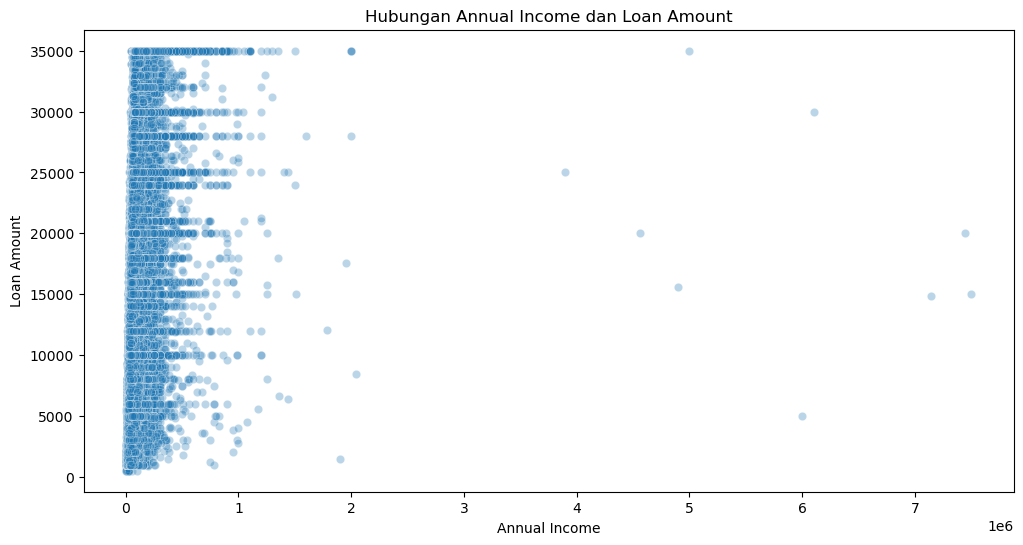

In [41]:
# Visualisasi hubungan annual_inc dengan loan_amnt
plt.figure(figsize=(12, 6))
sns.scatterplot(x='annual_inc', y='loan_amnt', data=data_copy, alpha=0.3)
plt.title('Hubungan Annual Income dan Loan Amount')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

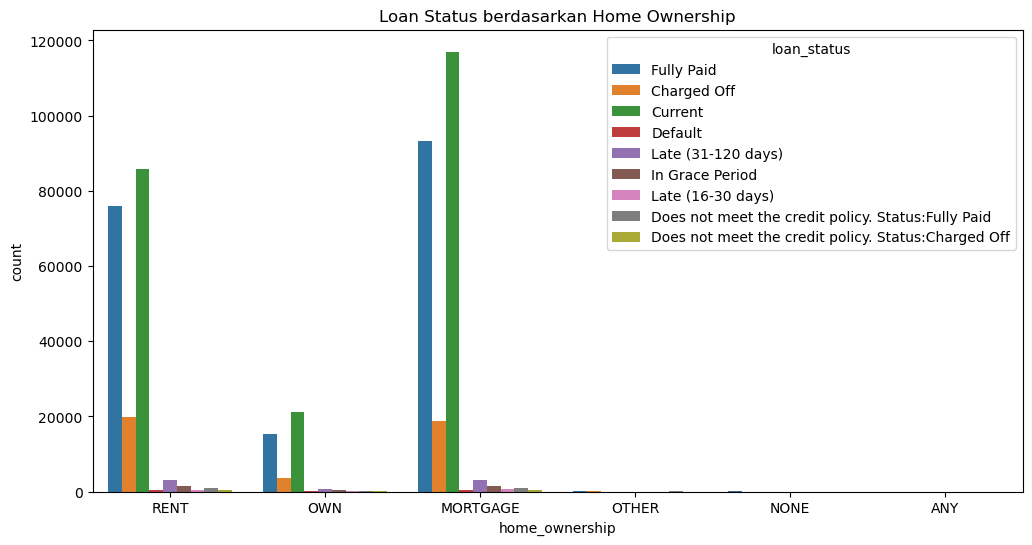

In [42]:
# Visualisasi loan status berdasarkan home_ownership
plt.figure(figsize=(12, 6))
sns.countplot(data=data_copy, x='home_ownership', hue='loan_status')
plt.title('Loan Status berdasarkan Home Ownership')
plt.show()

---

## Data Preparation

### drop kolom yang tidak memiliki nilai dan tidak ada hubungan

In [46]:
data = data.dropna(axis=1, how = 'all')

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [48]:
# menghapus baris yang duplikat (jika ada)
data = data.drop_duplicates()

In [49]:
data.shape
# ternyata tidak ada baris yang duplikat

(466285, 58)

In [50]:
# Melihat jumlah nilai unik di setiap kolom
nunique_per_column = data.nunique()

# Menampilkan hasil
print(nunique_per_column)


Unnamed: 0                     466285
id                             466285
member_id                      466285
loan_amnt                        1352
funded_amnt                      1354
funded_amnt_inv                  9854
term                                2
int_rate                          506
installment                     55622
grade                               7
sub_grade                          35
emp_title                      205475
emp_length                         11
home_ownership                      6
annual_inc                      31901
verification_status                 3
issue_d                            91
loan_status                         9
pymnt_plan                          2
url                            466285
desc                           124435
purpose                            14
title                           63098
zip_code                          888
addr_state                         50
dti                              3997
delinq_2yrs 

dapat dilihat bahwa nilai unik dari beberapa kolom sama dengan jumlah baris pada dataset yaitu 466285 sehingga kita perlu mengeliminasinya

In [52]:
data.drop(columns=['id','member_id','url','Unnamed: 0'] , inplace = True)

saya mempertimbangkan kolom dengan nilai missing value kurang dari 10000 untuk dihilangkan baris bagian yang memiliki  nilai missing value nya

In [54]:
# Mengidentifikasi kolom dengan jumlah missing value < 10000
columns_with_few_missing = data.isnull().sum()[data.isnull().sum() < 10000].index

# Menghapus baris dengan missing value pada kolom tersebut
df_cleaned = data.dropna(subset=columns_with_few_missing)

In [55]:
df_cleaned.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [56]:
missing_columns = df_cleaned.isnull().sum()
missing_columns = missing_columns[missing_columns > 0]
missing_info = pd.DataFrame({
    'Column': missing_columns.index,
    'Missing Values': missing_columns.values,
    'Data Type': data.dtypes[missing_columns.index]
})
print(missing_info)

                                                  Column  Missing Values  \
emp_title                                      emp_title           27507   
emp_length                                    emp_length           20969   
desc                                                desc          339789   
mths_since_last_delinq            mths_since_last_delinq          249915   
mths_since_last_record            mths_since_last_record          402934   
next_pymnt_d                                next_pymnt_d          226579   
mths_since_last_major_derog  mths_since_last_major_derog          366574   
tot_coll_amt                                tot_coll_amt           69917   
tot_cur_bal                                  tot_cur_bal           69917   
total_rev_hi_lim                        total_rev_hi_lim           69917   

                            Data Type  
emp_title                      object  
emp_length                     object  
desc                           object  
mth

In [57]:
df_cleaned.describe(include = 'object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,465401,465401,465401,437894,444432,465401,465401,465401,465401,465401,...,465401,465401,465401,465401,465401,465401,465401,238822,465401,465401
unique,2,7,35,205072,11,6,3,89,9,2,...,14,62878,888,50,664,2,98,100,100,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,...,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,337249,136769,31654,5392,149844,235538,167791,38724,224096,465392,...,273815,163888,5298,71320,3667,302324,179515,208274,327417,465401


In [58]:
df_cleaned['zip_code'].nunique()

888

In [59]:
df_cleaned['application_type'].nunique()

1

In [60]:
df_cleaned['purpose'].value_counts()

purpose
debt_consolidation    273815
credit_card           104053
home_improvement       26461
other                  23548
major_purchase          9791
small_business          6978
car                     5375
medical                 4579
moving                  2982
vacation                2476
wedding                 2328
house                   2262
educational              404
renewable_energy         349
Name: count, dtype: int64

In [61]:
df_cleaned['title'].value_counts()

title
Debt consolidation                   163888
Credit card refinancing               62233
Debt Consolidation                    15741
Home improvement                      14817
Other                                 12678
                                      ...  
Becoming Fiscally Fit                     1
a clean slate                             1
Crush MY Credit Card                      1
Controlling My Financial Future           1
Paying off the car and some bills         1
Name: count, Length: 62878, dtype: int64

Fitur `application_type` ternyata hanya memiliki satu kategori. Sementara itu, fitur `zip_code` memiliki terlalu banyak kategori, dan kita sudah memiliki fitur `addr_state` yang lebih relevan untuk model. Selain itu, fitur `desc` dan `title` memiliki hubungan erat dengan `purpose`, tetapi jumlah kategorinya lebih banyak dan memerlukan proses pembersihan data yang kompleks. Karena informasi pada kedua fitur tersebut sudah cukup diwakili oleh `purpose`, fitur-fitur ini akan dihapus dari dataset.

In [63]:
df_cleaned.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [64]:
# drop irrelevant features
df_cleaned.drop(columns =['application_type' , 'zip_code' , 'desc', 'title' , 'pymnt_plan'] , inplace = True)

In [65]:
missing_columns = df_cleaned.isnull().sum()
missing_columns = missing_columns[missing_columns > 0]
missing_info = pd.DataFrame({
    'Column': missing_columns.index,
    'Missing Values': missing_columns.values,
    'Data Type': data.dtypes[missing_columns.index]
})
print(missing_info)

                                                  Column  Missing Values  \
emp_title                                      emp_title           27507   
emp_length                                    emp_length           20969   
mths_since_last_delinq            mths_since_last_delinq          249915   
mths_since_last_record            mths_since_last_record          402934   
next_pymnt_d                                next_pymnt_d          226579   
mths_since_last_major_derog  mths_since_last_major_derog          366574   
tot_coll_amt                                tot_coll_amt           69917   
tot_cur_bal                                  tot_cur_bal           69917   
total_rev_hi_lim                        total_rev_hi_lim           69917   

                            Data Type  
emp_title                      object  
emp_length                     object  
mths_since_last_delinq        float64  
mths_since_last_record        float64  
next_pymnt_d                   object  

In [66]:
df_cleaned['next_pymnt_d']

0            NaN
1            NaN
2            NaN
3            NaN
4         Feb-16
           ...  
466280    Feb-16
466281       NaN
466282    Feb-16
466283       NaN
466284    Feb-16
Name: next_pymnt_d, Length: 465401, dtype: object

In [67]:
# Contoh dataframe (sesuaikan dengan data Anda)
# df_cleaned = pd.read_csv('file.csv')  # Ganti dengan file dataset Anda

# Kolom yang akan diisi menggunakan model probabilistik
probabilistic_columns = ['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

# Kolom numerik lainnya yang akan diisi dengan modus
numerical_columns = ['mths_since_last_delinq', 'mths_since_last_record',
                     'mths_since_last_major_derog']

# 1. Menggunakan imputasi probabilistik untuk kolom probabilistic_columns
imputer = IterativeImputer(max_iter=10, random_state=42)
df_cleaned[probabilistic_columns] = imputer.fit_transform(df_cleaned[probabilistic_columns])

# 2. Menggunakan modus untuk kolom numerikal tertentu
for col in numerical_columns:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

# Menampilkan hasil setelah semua missing value diisi
print("Jumlah Missing Values Setelah Imputasi:")
print(df_cleaned.isnull().sum())

Jumlah Missing Values Setelah Imputasi:
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27507
emp_length                      20969
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
loan_status                         0
purpose                             0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_last_delinq              0
mths_since_last_record              0
open_acc                            0
pub_rec                             0
revol_bal 

In [68]:
df_cleaned['mths_since_last_record'].nunique()

123

In [69]:
df_cleaned[['emp_title','emp_length','next_pymnt_d']]

,emp_title,emp_length,next_pymnt_d
0,NaN,10+ years,NaN
1,Ryder,< 1 year,NaN
2,NaN,10+ years,NaN
3,AIR RESOURCES BOARD,10+ years,NaN
4,University Medical Group,1 year,Feb-16
...,...,...,...
466280,Financial Advisor,4 years,Feb-16
466281,Chief of Interpretation (Park Ranger),10+ years,NaN
466282,patrol,7 years,Feb-16
466283,Server Engineer Lead,3 years,NaN


saya memutuskan untuk mendrop kolom emp_title karena Jabatan pekerjaan peminjam memiliki terlalu banyak variasi (kategori unik) dan sering kali sulit untuk dinormalisasi. Stabilitas pekerjaan lebih baik diwakili oleh emp_length.

In [71]:
df_cleaned.drop(columns=['emp_title'], inplace=True)
print(df_cleaned.isnull().sum())

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_length                      20969
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
loan_status                         0
purpose                             0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_last_delinq              0
mths_since_last_record              0
open_acc                            0
pub_rec                             0
revol_bal                           0
revol_util                          0
total_acc   

In [72]:
df_cleaned[['emp_length','next_pymnt_d']]

,emp_length,next_pymnt_d
0,10+ years,NaN
1,< 1 year,NaN
2,10+ years,NaN
3,10+ years,NaN
4,1 year,Feb-16
...,...,...
466280,4 years,Feb-16
466281,10+ years,NaN
466282,7 years,Feb-16
466283,3 years,NaN


In [73]:
df_cleaned['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [74]:
df_cleaned['next_pymnt_d'].unique()

array([nan, 'Feb-16', 'Jan-16', 'Sep-13', 'Feb-14', 'May-14', 'Jun-13',
       'Mar-12', 'Apr-12', 'May-13', 'Aug-12', 'Aug-13', 'Jun-12',
       'Nov-13', 'Feb-12', 'Oct-11', 'Jan-13', 'Jan-14', 'Jul-13',
       'Jul-15', 'Jan-12', 'Dec-12', 'Jun-11', 'Feb-13', 'Nov-11',
       'Nov-12', 'Dec-11', 'Aug-11', 'Sep-11', 'Apr-11', 'Mar-14',
       'Apr-13', 'Mar-11', 'Jul-12', 'Aug-14', 'Oct-13', 'Sep-12',
       'May-12', 'Apr-15', 'Jul-11', 'Dec-15', 'Dec-13', 'Jan-11',
       'Oct-12', 'Nov-14', 'Mar-13', 'Aug-15', 'Feb-15', 'May-15',
       'Jul-14', 'Nov-15', 'Sep-14', 'Oct-15', 'May-11', 'Feb-11',
       'Dec-14', 'Jun-15', 'Apr-14', 'Jan-15', 'Sep-15', 'Jun-14',
       'Nov-10', 'Oct-10', 'Dec-10', 'Mar-15', 'Oct-14', 'Jul-10',
       'Sep-10', 'May-10', 'Aug-10', 'Mar-10', 'Jun-10', 'Apr-10',
       'Feb-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Jan-10', 'Sep-09',
       'Jun-09', 'Aug-09', 'Jul-09', 'May-09', 'Apr-09', 'Jan-09',
       'Oct-08', 'Feb-09', 'Nov-08', 'Sep-08', 'Mar-09', 

saya mengisi missing values untuk emp_length sama dengan 10+ years karena ini adalah pola yang paling umum terjadi

In [76]:
df_cleaned['emp_length'] = df_cleaned['emp_length'].fillna(df_cleaned['emp_length'].mode()[0])
print(df_cleaned.isnull().sum())

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_length                          0
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
loan_status                         0
purpose                             0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_last_delinq              0
mths_since_last_record              0
open_acc                            0
pub_rec                             0
revol_bal                           0
revol_util                          0
total_acc   

### converting date columns
Karena format dari kolom-kolom waktu kurang jelas di Data Dictionary, maka saya hanya akan mengambil bulan saja, tidak tahun dan tanggal.

In [78]:
df_cleaned.describe(include='object')

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d
count,465401,465401,465401,465401,465401,465401,465401,465401,465401,465401,465401,465401,465401,238822,465401
unique,2,7,35,11,6,3,89,9,14,50,664,2,98,100,100
top,36 months,B,B3,10+ years,MORTGAGE,Verified,Oct-14,Current,debt_consolidation,CA,Oct-00,f,Jan-16,Feb-16,Jan-16
freq,337249,136769,31654,170813,235538,167791,38724,224096,273815,71320,3667,302324,179515,208274,327417


In [79]:
df_cleaned['issue_d'] = df_cleaned['issue_d'].str[:3]
df_cleaned['earliest_cr_line'] = df_cleaned['earliest_cr_line'].str[:3]
df_cleaned['last_pymnt_d'] = df_cleaned['last_pymnt_d'].str[:3]
df_cleaned['next_pymnt_d'] = df_cleaned['next_pymnt_d'].str[:3]
df_cleaned['last_credit_pull_d'] = df_cleaned['last_credit_pull_d'].str[:3]

In [80]:
# Mapping bulan ke angka
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

df_cleaned['issue_d'] = df_cleaned['issue_d'].map(month_mapping)
df_cleaned['earliest_cr_line'] = df_cleaned['earliest_cr_line'].map(month_mapping)
df_cleaned['last_pymnt_d'] = df_cleaned['last_pymnt_d'].map(month_mapping)
df_cleaned['next_pymnt_d'] = df_cleaned['next_pymnt_d'].map(month_mapping)
df_cleaned['last_credit_pull_d'] = df_cleaned['last_credit_pull_d'].map(month_mapping)

In [81]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 465401 entries, 0 to 466284
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    465401 non-null  int64  
 1   funded_amnt                  465401 non-null  int64  
 2   funded_amnt_inv              465401 non-null  float64
 3   term                         465401 non-null  object 
 4   int_rate                     465401 non-null  float64
 5   installment                  465401 non-null  float64
 6   grade                        465401 non-null  object 
 7   sub_grade                    465401 non-null  object 
 8   emp_length                   465401 non-null  object 
 9   home_ownership               465401 non-null  object 
 10  annual_inc                   465401 non-null  float64
 11  verification_status          465401 non-null  object 
 12  issue_d                      465401 non-null  int64  
 13  loan

### Labelling

In [83]:
df_cleaned['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [84]:
# Mapping kategori high risk dan non risky
loan_status_mapping = {
    'Fully Paid': 'Non Risky',
    'Does not meet the credit policy. Status:Fully Paid': 'Non Risky',
    'Current': 'Non Risky',
    'In Grace Period': 'High Risk',
    'Late (31-120 days)': 'High Risk',
    'Late (16-30 days)': 'High Risk',
    'Default': 'High Risk',
    'Charged Off': 'High Risk',
    'Does not meet the credit policy. Status:Charged Off': 'High Risk'
}

# Membuat kolom baru dengan mapping high risk dan non risky
df_cleaned['loan_status_risk'] = df_cleaned['loan_status'].map(loan_status_mapping)

# Mapping kategori risiko ke nilai numerik
loan_risk_mapping = {
    'High Risk': 1,
    'Non Risky': 0
}

# Membuat kolom baru dengan nilai numerik
df_cleaned['loan_risk'] = df_cleaned['loan_status_risk'].map(loan_risk_mapping)

# Menampilkan hasil unik dari kolom baru
print(df_cleaned[['loan_status', 'loan_status_risk', 'loan_risk']].head())

   loan_status loan_status_risk  loan_risk
0   Fully Paid        Non Risky          0
1  Charged Off        High Risk          1
2   Fully Paid        Non Risky          0
3   Fully Paid        Non Risky          0
4      Current        Non Risky          0


In [85]:
df_cleaned.drop(columns=['loan_status','loan_status_risk'], inplace=True)

In [86]:
print(df_cleaned.isnull().sum())

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_length                          0
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
purpose                             0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_last_delinq              0
mths_since_last_record              0
open_acc                            0
pub_rec                             0
revol_bal                           0
revol_util                          0
total_acc                           0
initial_list

In [87]:
df_cleaned['next_pymnt_d']

0         NaN
1         NaN
2         NaN
3         NaN
4         2.0
         ... 
466280    2.0
466281    NaN
466282    2.0
466283    NaN
466284    2.0
Name: next_pymnt_d, Length: 465401, dtype: float64

In [88]:
# Pilih kolom yang relevan untuk imputasi
relevant_columns = ['next_pymnt_d']
df_to_impute = df_cleaned[relevant_columns]

# Iterative Imputation
imputer = IterativeImputer(max_iter=10, random_state=42)
imputed_data = imputer.fit_transform(df_to_impute)

# Memperbarui kolom dengan hasil imputasi
df_cleaned['next_pymnt_d'] = imputed_data[:, 0]


In [89]:
print(df_cleaned.isnull().sum())

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
purpose                        0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymn

In [90]:
df_cleaned.dtypes

loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                          int64
purpose                         object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
earliest_cr_line                 int64
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                       float64
pub_rec                        float64
revol_bal                        int64
revol_util                     float64
total_acc                

In [91]:
df_cleaned['term']

0          36 months
1          60 months
2          36 months
3          36 months
4          60 months
             ...    
466280     60 months
466281     60 months
466282     60 months
466283     36 months
466284     36 months
Name: term, Length: 465401, dtype: object

## Feature Engineering

### encoding

In [94]:
## ini biar gampang aja
df = df_cleaned.copy()

In [95]:
df.describe(include = 'object')

,term,grade,sub_grade,emp_length,home_ownership,verification_status,purpose,addr_state,initial_list_status
count,465401,465401,465401,465401,465401,465401,465401,465401,465401
unique,2,7,35,11,6,3,14,50,2
top,36 months,B,B3,10+ years,MORTGAGE,Verified,debt_consolidation,CA,f
freq,337249,136769,31654,170813,235538,167791,273815,71320,302324


In [96]:
df['loan_risk'].value_counts()

loan_risk
0    410532
1     54869
Name: count, dtype: int64

### Ordinal Encoding
Fitur-fitur yang akan diterapkan ordinal encoding adalah:
- `term`
- `grade`
- `sub_grade`
- `emp_length`
- `verification_status`

In [98]:
term_mapping = {
    ' 36 months': 0,
    ' 60 months': 1,
}

grades = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
grade_mapping = {grade: idx + 1 for idx, grade in enumerate(grades)}

sub_grade_mapping = {'B2': 2, 'C4': 4, 'C5': 5, 'C1': 1, 'B5': 5, 'A4': 4, 'E1': 1, 'F2': 2,
 'C3': 3, 'B1': 1, 'D1': 1, 'A1': 1, 'B3': 3, 'B4': 4, 'C2': 2, 'D2': 2,
 'A3': 3, 'A5': 5, 'D5': 5, 'A2': 2, 'E4': 4, 'D3': 3, 'D4': 4, 'F3': 3,
 'E3': 3, 'F4': 4, 'F1': 1, 'E5': 5, 'G4': 4, 'E2': 2, 'G3': 3, 'G2': 2,
 'G1': 1, 'F5': 5, 'G5': 5}

emp_length_mapping = {
    '10+ years': 10,
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    None: -1
}

verification_mapping = {
    'Not Verified': 0,
    'Verified': 1,
    'Source Verified': 2
}

# Terapkan mapping
df['verification_status'] = df['verification_status'].map(verification_mapping)
df['term'] = df['term'].map(term_mapping)
df['grade'] = df['grade'].map(grade_mapping)
df['sub_grade'] = df['sub_grade'].map(sub_grade_mapping)
df['emp_length'] = df['emp_length'].map(emp_length_mapping)

In [99]:
df[['term', 'grade', 'sub_grade', 'emp_length']]

,term,grade,sub_grade,emp_length
0,0,2,2,10
1,1,3,4,0
2,0,3,5,10
3,0,3,1,10
4,1,2,5,1
...,...,...,...,...
466280,1,3,2,4
466281,1,4,5,10
466282,1,4,1,7
466283,0,1,4,3


### Target Encoding
Fitur-fitur yang akan diterapkan target encoding adalah:
- `home_ownership`
- `purpose`
- `addr_state`
- `initial_list_status`

In [101]:
df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [102]:
purpose_mapping = {
    'credit_card': 'Debt',
    'debt_consolidation': 'Debt',
    'car': 'Purchase',
    'home_improvement': 'Purchase',
    'major_purchase': 'Purchase',
    'house': 'Purchase',
    'wedding': 'Personal',
    'vacation': 'Personal',
    'moving': 'Personal',
    'educational': 'Education/Business',
    'small_business': 'Education/Business',
    'medical': 'Medical',
    'renewable_energy': 'Other',
    'other': 'Other'
}

# Terapkan mapping ke kolom purpose
df['purpose'] = df['purpose'].map(purpose_mapping)

In [103]:
# Fungsi untuk target encoding
def target_encode(df, feature_col, target_col):
    mean_encoding = df.groupby(feature_col)[target_col].mean()
    encoded_col = df[feature_col].map(mean_encoding)
    return encoded_col

In [104]:
df['home_ownership'] = target_encode(df, 'home_ownership', 'loan_risk')
df['purpose'] = target_encode(df, 'purpose', 'loan_risk')
df['addr_state'] = target_encode(df, 'addr_state', 'loan_risk')
df['initial_list_status'] = target_encode(df, 'initial_list_status', 'loan_risk')

In [105]:
df[['home_ownership', 'purpose', 'addr_state', 'initial_list_status']]

,home_ownership,purpose,addr_state,initial_list_status
0,0.134864,0.114805,0.119892,0.127707
1,0.134864,0.106336,0.112696,0.127707
2,0.134864,0.223652,0.101608,0.127707
3,0.134864,0.144955,0.120864,0.127707
4,0.134864,0.144955,0.109391,0.127707
...,...,...,...,...
466280,0.104302,0.114805,0.103959,0.099708
466281,0.104302,0.114805,0.121968,0.127707
466282,0.104302,0.114805,0.114836,0.127707
466283,0.117705,0.114805,0.120864,0.099708


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 465401 entries, 0 to 466284
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    465401 non-null  int64  
 1   funded_amnt                  465401 non-null  int64  
 2   funded_amnt_inv              465401 non-null  float64
 3   term                         465401 non-null  int64  
 4   int_rate                     465401 non-null  float64
 5   installment                  465401 non-null  float64
 6   grade                        465401 non-null  int64  
 7   sub_grade                    465401 non-null  int64  
 8   emp_length                   465401 non-null  int64  
 9   home_ownership               465401 non-null  float64
 10  annual_inc                   465401 non-null  float64
 11  verification_status          465401 non-null  int64  
 12  issue_d                      465401 non-null  int64  
 13  purp

In [115]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_risk
0,5000,5000,4975.0,0,10.65,162.87,2,2,10,0.134864,...,1.933415,1,0.0,45.0,1,0.0,191.847842,138793.479276,30391.168616,0
1,2500,2500,2500.0,1,15.27,59.83,3,4,0,0.134864,...,1.933415,9,0.0,45.0,1,0.0,191.847842,138793.479276,30391.168616,1
2,2400,2400,2400.0,0,15.96,84.33,3,5,10,0.134864,...,1.933415,1,0.0,45.0,1,0.0,191.847842,138793.479276,30391.168616,0
3,10000,10000,10000.0,0,13.49,339.31,3,1,10,0.134864,...,1.933415,1,0.0,45.0,1,0.0,191.847842,138793.479276,30391.168616,0
4,3000,3000,3000.0,1,12.69,67.79,2,5,1,0.134864,...,2.000000,1,0.0,45.0,1,0.0,191.847842,138793.479276,30391.168616,0


## Data Modelling

### Logistic Regression

In [109]:
# Misal data kita berada di DataFrame 'data' dan target variabel ada di 'target_column'
# Memisahkan fitur dan target
X = df.drop(columns='loan_risk')  # Fitur
y = df['loan_risk']  # Target

# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Memilih Model Machine Learning (Logistic Regression dalam hal ini)
model = LogisticRegression()

# 2. Pelatihan Model pada Set Pelatihan
model.fit(X_train, y_train)

LogisticRegression()

In [110]:
# 3. Penyesuaian Parameter Model (Hyperparameter Tuning menggunakan GridSearchCV)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers yang digunakan
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)

# Model terbaik setelah tuning hyperparameter
best_model = grid_search.best_estimator_

Best Parameters: {'C': 10, 'solver': 'liblinear'}


Accuracy: 0.9718380472851506
Precision: 0.9973995271867613
Recall: 0.7644962551340904
ROC-AUC: 0.950458480216491
Train Accuracy: 0.9720240653201547
Test Accuracy: 0.9718380472851506


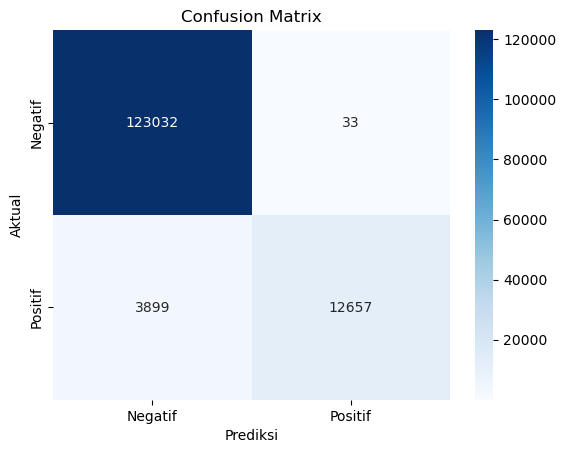

In [111]:
# 4. Evaluasi Kinerja Model
y_pred = best_model.predict(X_test)

# Metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC: {roc_auc}")

# 5. Memeriksa Overfitting atau Underfitting
# Membandingkan kinerja pada data pelatihan dan data uji
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Visualisasi Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

# Jika model overfitting, akurasi data pelatihan jauh lebih tinggi daripada data uji
# Jika model underfitting, baik akurasi data pelatihan maupun uji akan rendah.

## XgBoost

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Accuracy: 0.987258363713195
Precision: 0.9937186769127965
Recall: 0.8982242087460739
ROC-AUC: 0.9914449939717711


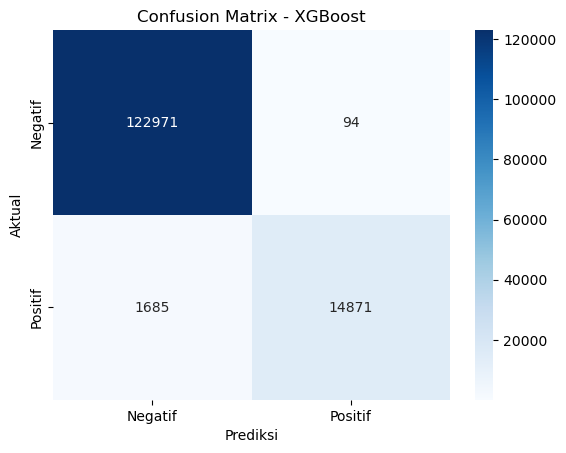

Train Accuracy: 0.9889158327705814
Test Accuracy: 0.987258363713195


In [188]:
# Misal data kita berada di DataFrame 'df' dengan target 'loan_risk'
X1 = df.drop(columns='loan_risk')  # Fitur
y1 = df['loan_risk']  # Target

# Split data menjadi training dan testing
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

# 1. Inisialisasi model XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# 2. Hyperparameter tuning menggunakan GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Jumlah pohon
    'max_depth': [3, 5, 7],         # Kedalaman pohon
    'learning_rate': [0.01, 0.1, 0.2],  # Laju pembelajaran
    'subsample': [0.8, 1.0],        # Proporsi sampel
    'colsample_bytree': [0.8, 1.0], # Proporsi fitur
}

# Change n_jobs to 1 to disable parallel processing during grid search
grid_search1 = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=1)
grid_search1.fit(X_train1, y_train1)

# Menampilkan parameter terbaik
print("Best Parameters:", grid_search1.best_params_) # Corrected to use grid_search1

# Model terbaik setelah tuning
best_model = grid_search1.best_estimator_ # Corrected to use grid_search1

# 3. Evaluasi Model
# Prediksi pada data test
y_pred1 = best_model.predict(X_test1)
y_pred_proba1 = best_model.predict_proba(X_test1)[:, 1]

# Metrik evaluasi
accuracy = accuracy_score(y_test1, y_pred1)
precision = precision_score(y_test1, y_pred1)
recall = recall_score(y_test1, y_pred1)
roc_auc = roc_auc_score(y_test1, y_pred_proba1)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC: {roc_auc}")

# 4. Visualisasi Confusion Matrix
conf_matrix = confusion_matrix(y_test1, y_pred1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

# 5. Mengecek Overfitting/Underfitting
train_accuracy = accuracy_score(y_train1, best_model.predict(X_train1))
test_accuracy = accuracy_score(y_test1, y_pred1)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")